In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('bank-full.csv',sep=';')

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
features = ['age', 'job', 'marital', 'education','balance', 'housing','contact','day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y' ]
len(features)

15

In [7]:
df = df[features].copy()
df

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,1729,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,5715,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,668,no,telephone,17,nov,508,4,-1,0,unknown,no


In [8]:
df.y = (df.y == 'yes').astype(int)

In [9]:
df

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,1729,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,5715,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,668,no,telephone,17,nov,508,4,-1,0,unknown,0


In [10]:
# Lets split the data
SEED = 1
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = SEED)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = SEED)
len(df_train), len(df_test), len(df_val)

(27126, 9043, 9042)

In [11]:
assert len(df) == (len(df_train) + len(df_test) + len(df_val))

In [12]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [13]:
y_train = df_train.y.values
y_test = df_test.y.values
y_val = df_val.y.values

len(y_train), len(y_test), len(y_val)

(27126, 9043, 9042)

In [14]:
del df_train['y']
del df_test['y']
del df_val['y']

In [15]:
# Question 1 Which numerical variable (among the following 4) has the highest AUC?

numerical = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical = ['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

scores = pd.DataFrame(columns=['feature','auc_score'])
idx = 0
for feature in numerical :
    auc_score = roc_auc_score(y_train, df_train[feature])
    if auc_score < 0.5:
        auc_score = roc_auc_score(y_train, -df_train[feature])
    print(f'feature {feature}, auc_score = {auc_score}')
    scores.loc[idx] = [feature, auc_score]
    idx += 1

feature age, auc_score = 0.512185717527344
feature balance, auc_score = 0.5888313805382317
feature day, auc_score = 0.525957882383908
feature duration, auc_score = 0.8147002759670778
feature campaign, auc_score = 0.5714543015682159
feature pdays, auc_score = 0.5901276247352144
feature previous, auc_score = 0.5985653242764153


In [16]:
scores.sort_values(ascending=False, by='auc_score')

,feature,auc_score
3,duration,0.814700
6,previous,0.598565
5,pdays,0.590128
1,balance,0.588831
4,campaign,0.571454
2,day,0.525958
0,age,0.512186


In [17]:
# answer for question 1 is duration

In [18]:
# Question 2

dv = DictVectorizer(sparse=False)
dict_train = df_train.to_dict(orient='records')
X_train = dv.fit_transform(dict_train)

dict_val = df_val.to_dict(orient='records')
X_val = dv.transform(dict_val)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_val)[:,1]


In [19]:
y_pred

array([0.02995567, 0.0231619 , 0.0207711 , ..., 0.24874242, 0.0021865 ,
       0.03779507])

In [41]:
model_auc_score = np.round(roc_auc_score(y_val, y_pred),3)

In [42]:
model_auc_score

0.911

In [22]:
# Question 3

thresholds = np.arange(0.0, 1.01, 0.01)
scores = []

for threshold in thresholds:
    actual_pos = (y_val == 1)
    actual_neg = (y_val == 0)

    pred_pos = (y_pred >= threshold)
    pred_neg = (y_pred < threshold)

    tp = (actual_pos & pred_pos).sum()
    tn = (actual_neg & pred_neg).sum()

    fp = (pred_pos & actual_neg).sum()
    fn = (pred_neg & actual_pos).sum()

    scores.append((threshold, tp, fp, fn, tn))

columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
scores_df = pd.DataFrame(scores, columns=columns)

scores_df['p'] = scores_df.tp / (scores_df.tp + scores_df.fp)
scores_df['r'] = scores_df.tp / (scores_df.tp + scores_df.fn)




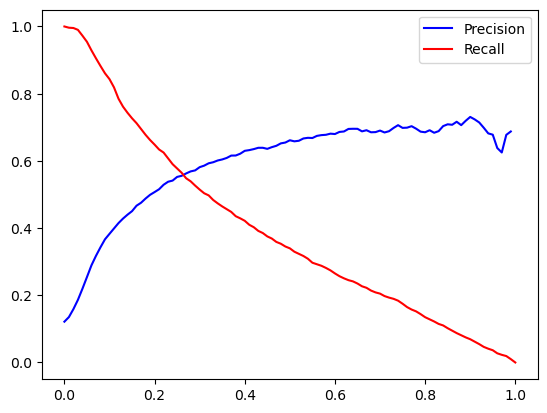

In [23]:
plt.figure()
plt.plot(scores_df['threshold'], scores_df['p'], label = 'Precision', color = 'blue')
plt.plot(scores_df['threshold'], scores_df['r'], label = 'Recall', color = 'red')
plt.legend()
plt.show()

In [24]:
# Answer for question 3 is 0.26, from the above diagram we see that 

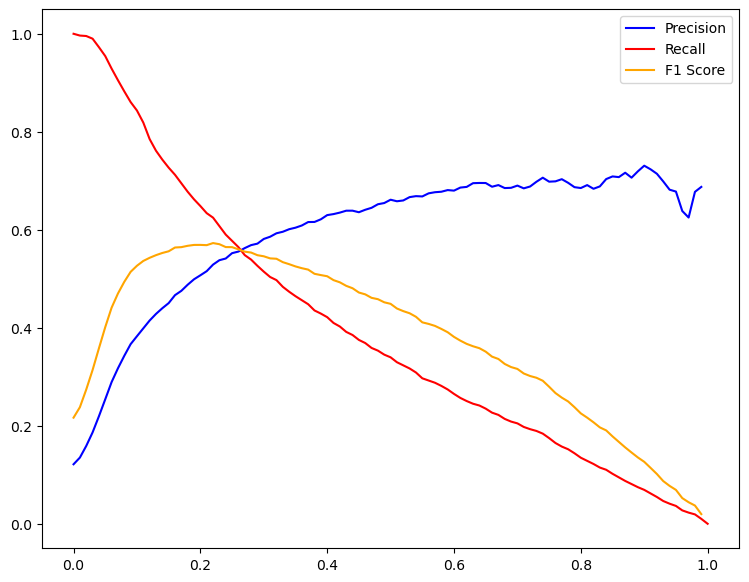

In [25]:
scores_df['f1'] = 2 * (scores_df.p * scores_df.r) / (scores_df.p + scores_df.r)
plt.figure(figsize=(9,7))
plt.plot(scores_df['threshold'], scores_df['p'], label = 'Precision', color = 'blue')
plt.plot(scores_df['threshold'], scores_df['r'], label = 'Recall', color = 'red')
plt.plot(scores_df['threshold'], scores_df['f1'], label = 'F1 Score', color = 'orange')
plt.legend()
plt.show()

In [26]:
scores_df.loc[scores_df.f1.idxmax()]

threshold       0.220000
tp            686.000000
fp            611.000000
fn            412.000000
tn           7333.000000
p               0.528913
r               0.624772
f1              0.572860
Name: 22, dtype: float64

In [27]:
# Question 4 - At which threshold F1 is maximal?. Answer is 0.22

In [28]:
def train_predict(df_train, y_train, df_val, C):
    dv = DictVectorizer(sparse=False)

    train_dict = df_train[categorical + numerical].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    val_dict = df_val[categorical + numerical].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict_proba(X_val)[:, 1]

    return y_pred 
 


In [29]:
scores = []

kfold = KFold(n_splits=5, shuffle=True, random_state=SEED)

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.y.values
    y_val = df_val.y.values

    y_pred = train_predict(df_train, y_train, df_val, 1.0)

    auc_score = roc_auc_score(y_val, y_pred)
    scores.append(auc_score)
    

In [30]:
  print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.906 +- 0.005


In [31]:
for idx in np.arange(len(scores)):
    print(f'Index : {idx}, element at {idx} is : {scores[idx]}, diff from mean = {np.mean(scores) - scores[idx]}')

Index : 0, element at 0 is : 0.8996337422867463, diff from mean = 0.006041776812631627
Index : 1, element at 1 is : 0.8989702246244495, diff from mean = 0.006705294474928403
Index : 2, element at 2 is : 0.910268603410386, diff from mean = -0.004593084311008022
Index : 3, element at 3 is : 0.9080464917612037, diff from mean = -0.002370972661825732
Index : 4, element at 4 is : 0.9114585334141044, diff from mean = -0.005783014314726498


In [32]:
# Answer for question 5 is 0.006 [From the provided options 0.006 is closer to the std obtained above so choosing this one]

In [34]:
kfold = KFold(n_splits=5, shuffle=True, random_state=SEED)
for C in [0.000001, 0.001, 1]:
    scores = []
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
    
        y_train = df_train.y.values
        y_val = df_val.y.values
    
        y_pred = train_predict(df_train, y_train, df_val, C)
    
        auc_score = roc_auc_score(y_val, y_pred)
        scores.append(auc_score)

    print('C=%5s, %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))
        

C=1e-06, 0.701 +- 0.009
C=0.001, 0.861 +- 0.007
C=    1, 0.906 +- 0.005
